# Capstone Project: Social media sentiment analysis
## Part 3: Sentiment analysis

In [3]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas.util.testing as tm

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\frl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  # This is added back by InteractiveShellApp.init_path()


# Twitter sentiment analysis

For sentiment analysis, we chose a senimtent analyzer called VADER (Valence Aware Dictionary for Sentiment Reasoning), which is availble with Pyton's NLTK library. Sentiment Analysis involves classifying comments into categories such as "postive", "neutral", and "negative". VADER is selected because it is designed for analyzing live streams of social media content.VADER algo outputs sentiment scores to 4 classes of sentiments(negative, neutral, positive and compound (aggregated score)).

No preprocessing (e.g. removal of emoji, punctuation and capitalisation) is required as VADER requires those detail in sentiment analysis.

In [52]:
tweet_combined_clean=pd.read_csv('./dataset/tweet_combined_clean_v1.csv')

In [53]:
tweet_combined_clean.columns

Index(['brand', 'created_at', 'favorite_count', 'id', 'retweet_count',
       'source', 'text', 'user_created_at', 'user_followers_count',
       'user_friends_count', 'user_id', 'user_name', 'user_screen_name'],
      dtype='object')

In [54]:
# 0 is Samsung. 1 is Apple and 2 is Huawei.
tweet_combined_clean['brand'].value_counts()

0    2438
2    2404
1    2211
Name: brand, dtype: int64

In [55]:
# Create a function to analyse sentiment

sentiment = SentimentIntensityAnalyzer()

def sentiment_score(data,title):
    data['sentiment'] = data['text'].apply(lambda x: sentiment.polarity_scores(x)['compound'])

    pos = len(data[data.sentiment > 0])
    neg = len(data[data.sentiment < 0])
    neu = len(data[data.sentiment == 0])
    pos_percent=pos/(pos+neg+neu)
    neg_percent=neg/(neg+neg+neu)
    neu_percent=neu/(pos+neg+neu)

    y = [ pos_percent, neu_percent, neg_percent]
    x=['positive', 'neutral', 'negative']
    print('Percentage positive sentiment: ', pos_percent)
    print('Percentage negative sentiment: ', neg_percent)
    print('Percentage neutral sentiment: ', neu_percent)
    
    # For plotting individual brands
    #plt.title('{}'.format(title))
    #plt.ylabel('Rating')
    #plt.xticks(range(len(y)), ['positive', 'neutral', 'negative'])
    #plt.bar(range(len(y)), height=y, width = 0.75, align = 'center', alpha = 0.8)
 
    plt.show()
    return y


Percentage positive sentiment:  0.36594357011200906
Percentage negative sentiment:  0.2573895715709067
Percentage neutral sentiment:  0.41429179072735006


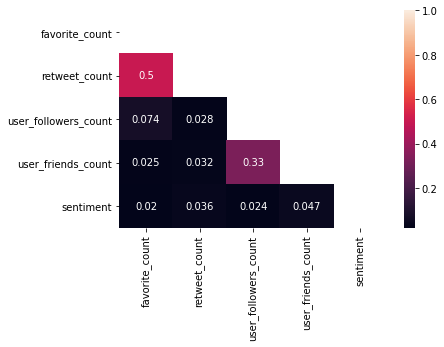

In [56]:
#Check if sentiment rating on tweets is correlated to Twitter statistics
sentiment_all=sentiment_score(tweet_combined_clean,'all');
tweet_combined_clean_forcorr=tweet_combined_clean.drop(columns=['brand','id','user_id'])
mask = np.triu(np.ones_like(tweet_combined_clean_forcorr.corr(), dtype=np.bool))
sns.heatmap(tweet_combined_clean_forcorr.corr(), mask=mask, annot=True)

Sentiment gathered from tweets is not correlated to tweet statistics (number of retweets, favourite counts, etc.).
There is no way to tell whether a tweet is positive or negative based on its statistics.
Tweet statistics cannot reflect consumer sentiment. Therefore, sentiment analysis on tweets is useful as it provides new insights to marketing team.


In [57]:
# Filter tweets according respective brands
samsung_tweet =tweet_combined_clean[tweet_combined_clean['brand']==0]
apple_tweet=tweet_combined_clean[tweet_combined_clean['brand']==1]
huawei_tweet=tweet_combined_clean[tweet_combined_clean['brand']==2]

In [58]:
sentiment_samsung=sentiment_score(samsung_tweet,'Samsung');

Percentage positive sentiment:  0.39581624282198524
Percentage negative sentiment:  0.2110337439742903
Percentage neutral sentiment:  0.44257588187038555


C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
sentiment_apple=sentiment_score(apple_tweet,'Apple');


Percentage positive sentiment:  0.373134328358209
Percentage negative sentiment:  0.23298284449363585
Percentage neutral sentiment:  0.4364540931705111


C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
sentiment_huawei=sentiment_score(huawei_tweet,'Huawei');

Percentage positive sentiment:  0.3290349417637271
Percentage negative sentiment:  0.31303236797274275
Percentage neutral sentiment:  0.3652246256239601


C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


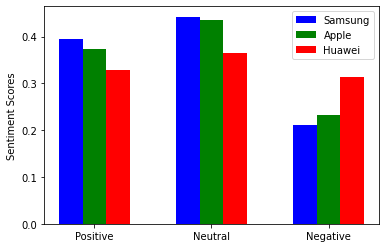

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
ind = np.arange(3)
width = 0.2

rects1 = ax.bar(ind, sentiment_samsung, width, color='b')
rects2 = ax.bar(ind+width, sentiment_apple, width, color='g')
rects3 = ax.bar(ind+width*2, sentiment_huawei, width, color='r')

ax.set_ylabel('Sentiment Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Positive', 'Neutral', 'Negative') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Samsung', 'Apple', 'Huawei') )

plt.show()

Samsung and Apple's twitter sentiments are quite close. Sentiment towards Huawei is more negative compared to Apple and Samsung. Deeper analysis is conducted using topic modeling.

In [27]:
# Most negative Samsung tweets
samsung_tweet.loc[samsung_tweet['sentiment'].sort_values(ascending=True).index[0:5]]

,brand,created_at,favorite_count,id,retweet_count,source,text,user_created_at,user_followers_count,user_friends_count,user_id,user_name,user_screen_name,sentiment
524,0,2020-04-08 21:49:34,0,1248005090146783232,0,Twitter for Android,@Samsung why does your device file transfer SU...,2019-01-05 23:56:47,5,65,1081701071851012096,data usage warning,mr_sure_why_not,-0.9331
683,0,2020-04-08 20:42:17,0,1247988157859102723,0,Twitter for Android,@OnePlus_USA No price and who the hell is goin...,2018-11-24 14:51:25,850,978,1066343537992769537,Virgil Cane,OrvilleCane,-0.8979
856,0,2020-04-08 19:32:21,0,1247970558446362624,0,Twitter for Android,@Suaespontis @JoshingYouNow What anger? The on...,2018-01-23 22:57:23,49,57,955937535506690048,Kat and Abbie,kat_abbie,-0.8934
2031,0,2020-04-08 12:26:38,0,1247863420751360001,0,Twitter for iPhone,@MaxWinebach Im starting to miss my samsung bu...,2017-08-22 14:19:32,96,281,899999483513237504,.•.D Ë Ä Ñ,Deang_90,-0.8625
1204,0,2020-04-08 17:42:12,0,1247942835929632769,0,Twitter for iPhone,Fuck this I hate everything\nEverything is aga...,2018-11-04 21:46:40,102,138,1059200281852837888,🍎🔴🐝 Au / Tartarstan 🍎🔴🐝,Slime_bapple,-0.8555


In [62]:
# Save Samsung's negative tweet for topic modeling
samsung_tweet_neg=samsung_tweet[samsung_tweet['sentiment']<0]
samsung_tweet_neg.to_csv('./dataset/samsung_tweet_neg.csv')

In [29]:
# Most positive Samsung tweets
samsung_tweet.loc[samsung_tweet['sentiment'].sort_values(ascending=False).index[0:5]]

,brand,created_at,favorite_count,id,retweet_count,source,text,user_created_at,user_followers_count,user_friends_count,user_id,user_name,user_screen_name,sentiment
2417,0,2020-04-08 08:42:04,0,1247806908527808514,0,Twitter for iPhone,@nicofestival I heard from a friend u can get ...,2013-08-25 17:46:24,1443,983,1699769648,Tuna 🤭,HappiTuna,0.9468
327,0,2020-04-08 23:47:51,0,1248034853645422593,0,Twitter for Android,"@SamsungUK THANK YOU, I'm chuffed to bits with...",2015-08-30 04:42:19,381,79,3487454175,Justin House,MrJustinHouse,0.9438
2228,0,2020-04-08 10:35:52,2,1247835547231494144,0,Twitter for iPhone,"Ok, but I only like Samsung tho. I don’t like ...",2020-01-27 17:51:02,606,639,1221853105794535424,⁸Alisha⁷ loves Mingi⁰³²⁵ 💘🦋,hearttmingi,0.9274
528,0,2020-04-08 21:47:01,0,1248004448468664321,0,Twitter for iPhone,@_amasse hi alex!! i am so super duper excited...,2020-04-08 21:36:21,4,10,1248001728609488896,madi,madi74640837,0.9251
412,0,2020-04-08 22:56:01,1,1248021812493107200,0,Twitter for Android,@PlaystationPixy Excellent choice. Ah yes bigg...,2012-05-12 09:33:34,1723,1498,577906822,Milly 🎮,millytigger1,0.9231


In [66]:
# Save Samsung's positive tweet for topic modeling
samsung_tweet_pos=samsung_tweet[samsung_tweet['sentiment']>0]
samsung_tweet_pos.to_csv('./dataset/samsung_tweet_pos.csv')

In [31]:
# Check if retweet count, user friends count, favourite count, user followers count were correlated to sentiment
samsung_corr=np.abs(samsung_tweet.corr()[['sentiment']]).sort_values('sentiment',ascending=False);
samsung_corr

,sentiment
sentiment,1.000000
user_friends_count,0.060527
retweet_count,0.057359
user_followers_count,0.054877
id,0.034881
favorite_count,0.004246
user_id,0.000663
brand,NaN


For Samsung, sentiment analysis from tweets are not very correlated to tweets statistics (favourite count, retweets, user followers count)

In [246]:
# Most negative Apple tweets
apple_tweet.loc[apple_tweet['sentiment'].sort_values(ascending=True).index[0:5]]

,brand,created_at,favorite_count,id,retweet_count,source,user_created_at,user_followers_count,user_friends_count,user_id,user_name,user_screen_name,clean_text,sentiment
3416,1,2020-04-08 06:06:57,2,1247767869393264650,0,Twitter for Android,2013-07-29 10:54:33,667,580,1630094204,Clarington,Lady_Clarington,dididrama chennessybooks oh hell sound dire afraid someone chronic back pain suggest http fse,-0.8979
2904,1,2020-04-08 07:05:13,1,1247782532872953856,0,Twitter Web App,2019-09-03 10:22:00,3,47,1168831262859153408,Ann-Marie Huneck,AnnHuneck,veganella sad even worse put apple mouth whish people stop unhealthy diet,-0.8957
2506,1,2020-04-08 07:48:19,0,1247793382534967300,0,Twitter for Android,2017-11-20 19:16:27,292,385,932689111776923650,Future Hlabangana🏘️🇿🇼🇿🇦🏗️,FutureHlabanga3,bestyb iamtbotouch apple microsoft african raped killed religion name jesus land http cqrqcliusj,-0.8779
2675,1,2020-04-08 07:31:04,0,1247789039006052359,0,Tweetbot for iΟS,2011-03-26 05:17:11,1178,1887,272273712,PatrioticAmericanLettingTruth&FreedomRing,fuzwuzrea,realdonaldtrump donaldjtrumpjr put american back work modeling bullied everyone enough http fu rbrr,-0.8689
3747,1,2020-04-08 05:32:31,2,1247759206016356352,0,Twitter for iPhone,2012-06-04 18:11:09,1900,918,599447263,scorsexy,bettydrapers,worst meal life chili olive garden apple bee def worst pa http iqlmngnvm,-0.8481


In [248]:
# Most positive Apple tweets
apple_tweet.loc[apple_tweet['sentiment'].sort_values(ascending=False).index[0:5]]

,brand,created_at,favorite_count,id,retweet_count,source,user_created_at,user_followers_count,user_friends_count,user_id,user_name,user_screen_name,clean_text,sentiment
4125,1,2020-04-08 04:53:15,1,1247749323758006272,0,Twitter Web App,2013-12-07 06:21:22,11,662,2234068825,Kiran Patil,KiranPatil_4911,amazonin eligible win apple iphone xr smartphone love smartphone happy see winner http qsov tukz,0.9477
3605,1,2020-04-08 05:47:23,2,1247762945703960590,0,Twitter for iPhone,2017-03-09 11:26:04,2370,2420,839799443968962560,🏴󠁧󠁢󠁷󠁬󠁳󠁿Wendy Smith met Matt🏴󠁧󠁢󠁷󠁬󠁳󠁿,BabyDragon5067,chantel smith lynne neilhimself holmanray oh wow beautiful course hope enjoy http tiia gjm,0.9300
2631,1,2020-04-08 07:35:21,2,1247790118703738881,2,Twitter for iPhone,2010-11-16 09:28:00,12180,996,216297584,"ckay, the first.",ckay_yo,aprilmaeyonce ep gooood like good love beautiful music listen http pbkazsj,0.9260
4578,1,2020-04-08 04:11:18,0,1247738767605026816,0,Twitter Web App,2019-10-22 04:36:14,6,22,1186501376253157376,Anju Pillai,AnjuPillai13,amazoninquiz quiztimemorningswithamazon count th april begin win beautiful best apple ipho http pl joe,0.9169
3149,1,2020-04-08 06:35:09,0,1247774966700896256,0,Twitter for Android,2013-09-10 07:25:15,853,4994,1850696654,Burda Ellis Comics,RealBurdaEllisC,jvosketches good laugh external bat cave nightwing batgirl lol awesomely fascinating http naohmb ug,0.9153


In [251]:
# Check if retweet count, user friends count, favourite count, user followers count were correlated to sentiment
apple_corr=np.abs(apple_tweet.corr()[['sentiment']]).sort_values('sentiment',ascending=False);
apple_corr

,sentiment
sentiment,1.000000
user_id,0.049267
user_friends_count,0.046386
retweet_count,0.033679
favorite_count,0.026780
id,0.018190
user_followers_count,0.015076
brand,NaN


For Apple, sentiment analysis from tweets are not very correlated to tweets statistics (favourite count, retweets, user followers count)

In [121]:
# Most negative Huawei tweet
huawei_tweet.loc[huawei_tweet['sentiment'].sort_values(ascending=True).index[0:5]]

,brand,created_at,favorite_count,id,retweet_count,source,user_created_at,user_followers_count,user_friends_count,user_id,user_name,user_screen_name,clean_text,sentiment
5546,2,2020-04-07 22:17:48,0,1247649806778085376,0,Twitter for Android,2017-07-27 17:34:07,51,110,890626366269407232,Carole Landry,CaroleL51961,salennie timmysigmend huawei tower dangerous cause cancer kill wildlife nobody want ffs educate,-0.9493
6428,2,2020-04-07 16:15:39,0,1247558668666707970,0,Twitter for Android,2019-11-04 04:53:31,30,50,1191216790547894272,A . V,Amir89792909,huawei murderer assassin criminal main source cronarovius pendamic killer say big chine http ubvgfsw,-0.9231
5551,2,2020-04-07 22:16:09,0,1247649390690435078,0,Twitter for Android,2017-07-27 17:34:07,51,110,890626366269407232,Carole Landry,CaroleL51961,timmysigmend huawei dangerous cause cancer kill wildlife take tower way,-0.9217
5757,2,2020-04-07 20:41:26,1,1247625553877893121,0,Twitter Web App,2019-08-02 05:22:43,2312,2020,1157159772677795841,WIDE-Awake-NZ- Wwg1Wga- #WokeElf #ArrestArdern,NZStill,aniobrien tovaobrien def starting hate vile gov evil plkan u knowingly usi http rahve krr,-0.9217
6795,2,2020-04-07 14:04:07,0,1247525566065995778,0,Twitter Web App,2009-07-09 03:36:17,883,1260,55130160,PYEWHACKETT,Pyewhackett02,going cold war going much information war economic war http ybjcv ljfk,-0.9136


In [122]:
#Most positive Huawei Tweets
huawei_tweet.loc[huawei_tweet['sentiment'].sort_values(ascending=False).index[0:5]]

,brand,created_at,favorite_count,id,retweet_count,source,user_created_at,user_followers_count,user_friends_count,user_id,user_name,user_screen_name,clean_text,sentiment
6049,2,2020-04-07 18:57:12,0,1247599322881015808,0,Twitter Web App,2017-05-07 16:58:49,90,92,861264063741009920,haamyd,haamyd13,rose huaweient huawei oh oh god really best friend best http fb vn wem,0.9389
7205,2,2020-04-07 10:40:15,2,1247474262987997184,1,Twitter for Android,2020-04-05 21:52:31,3,99,1246918602562899968,Paul Paulyestar Makasela GoD,MakaselaGod,huaweiza amazing technology huawei lovely chance win something side bran http hzuqjpx,0.9246
7145,2,2020-04-07 11:12:57,1,1247482491017011200,1,Twitter for Android,2020-04-05 21:52:31,3,99,1246918602562899968,Paul Paulyestar Makasela GoD,MakaselaGod,career huawei huawei europe wait day global ambessoder beautiful super amazing br http mcrsad ww,0.9118
6303,2,2020-04-07 17:08:40,1,1247572008088543233,0,Twitter for Android,2019-04-23 07:14:01,1287,17,1120586609211133952,Tech Over WATCH,Tech_OverWatch,huaweinigeria good value money outstanding battery good camera massive screen real estate http gqih ry kd,0.9042
5111,2,2020-04-08 03:13:46,4,1247724287563366401,1,Twitter for iPhone,2015-06-24 22:39:50,127,206,3254933340,mahmood.ayash,MahmoodAyash,mike imc huawei always surprised world amazing technology fan company great http zuf gzbt,0.9022


In [254]:
# Check if retweet count, user friends count, favourite count, user followers count were correlated to sentiment
huawei_corr=np.abs(huawei_tweet.corr()[['sentiment']]).sort_values('sentiment',ascending=False);
huawei_corr

,sentiment
sentiment,1.000000
user_friends_count,0.050625
favorite_count,0.045177
retweet_count,0.039230
id,0.034219
user_id,0.018117
user_followers_count,0.012890
brand,NaN


For Huawei, sentiment analysis from tweets are not very correlated to tweets statistics (favourite count, retweets, user followers count)